# Bill

In [6]:
#import python libraries needed
import sqlite3
import sqlalchemy
from sqlalchemy import create_engine
import pandas as pd
import csv

# Pre-process

In [14]:
#reading the csv emoji file
df = pd.read_csv('emoji_df.csv', index_col=0)
df2= df.rename(columns = {'name':'emojiname'})
df2.head()

,emojiname,emojigroup,sub_group,unicode
emoji,,,,
😀,grinning face,Smileys & Emotion,face-smiling,1F600
😃,grinning face with big eyes,Smileys & Emotion,face-smiling,1F603
😄,grinning face with smiling eyes,Smileys & Emotion,face-smiling,1F604
😁,beaming face with smiling eyes,Smileys & Emotion,face-smiling,1F601
😆,grinning squinting face,Smileys & Emotion,face-smiling,1F606


In [8]:
boolean =  df2["unicode"].is_unique      # if there's duplicate
boolean = df2.duplicated(subset=['unicode']).any()
boolean

False

In [9]:
# importing the module
import keyword

# printing the keywords
print("Python keywords are...")
print(keyword.kwlist)

Python keywords are...
['False', 'None', 'True', 'and', 'as', 'assert', 'async', 'await', 'break', 'class', 'continue', 'def', 'del', 'elif', 'else', 'except', 'finally', 'for', 'from', 'global', 'if', 'import', 'in', 'is', 'lambda', 'nonlocal', 'not', 'or', 'pass', 'raise', 'return', 'try', 'while', 'with', 'yield']


In [10]:
  
engine = sqlalchemy.create_engine('sqlite:///emoji_database.db')

In [11]:
#creating table in database and its columns
connection = sqlite3.connect('emoji_database.db')
                                                                                  
create_sqltable = """CREATE TABLE IF NOT EXISTS EmojiTable(emoji VARCHAR NOT NULL,emojiname VARCHAR NOT NULL,emojigroup VARCHAR NOT NULL,sub_group VARCHAR NOT NULL,unicode VARCHAR NOT NULL)"""
cursor = connection.cursor()

cursor.execute(create_sqltable)


# attached the itertuples of the pandas dataframe to insert its value to the database with columns that we created above

In [ ]:


for row in df2.itertuples():
    insert_sql = f"INSERT INTO EmojiTable(emoji, emojiname , emojigroup, sub_group, unicode) VALUES ('{row[0]}', '{row[1]}', '{row[2]}','{row[3]}','{row[4]}')"
    
    cursor.execute(insert_sql)
    
    #do commit after this
connection.commit()

In [12]:
connection = sqlite3.connect('emoji_database.db')
                   
cursor = connection.cursor()

command1= """SELECT * FROM EmojiTable WHERE emojigroup = "Smileys & Emotion" """
cursor.execute(command1) 

emojiitems = cursor.fetchall() 
            
    #Loop through items in db
for i in emojiitems:
    print(*i)  #we put * so it wont print a parentheses around it


😀 grinning face Smileys & Emotion face-smiling 1F600
😃 grinning face with big eyes Smileys & Emotion face-smiling 1F603
😄 grinning face with smiling eyes Smileys & Emotion face-smiling 1F604
😁 beaming face with smiling eyes Smileys & Emotion face-smiling 1F601
😆 grinning squinting face Smileys & Emotion face-smiling 1F606
😅 grinning face with sweat Smileys & Emotion face-smiling 1F605
🤣 rolling on the floor laughing Smileys & Emotion face-smiling 1F923
😂 face with tears of joy Smileys & Emotion face-smiling 1F602
🙂 slightly smiling face Smileys & Emotion face-smiling 1F642
🙃 upside-down face Smileys & Emotion face-smiling 1F643
😉 winking face Smileys & Emotion face-smiling 1F609
😊 smiling face with smiling eyes Smileys & Emotion face-smiling 1F60A
😇 smiling face with halo Smileys & Emotion face-smiling 1F607
🥰 smiling face with hearts Smileys & Emotion face-affection 1F970
😍 smiling face with heart-eyes Smileys & Emotion face-affection 1F60D
🤩 star-struck Smileys & Emotion face-affecti

In [ ]:
connection = sqlite3.connect('emoji_database.db')
cursor =  connection.cursor()
search_string = input("enter text")

command= "SELECT emoji FROM EmojiTable WHERE sub_group = '"+search_string+"'"
cursor.execute(command) 

emojiitems = cursor.fetchall() 

#Loop through items in db
for item in emojiitems:
    print(str(*item)) 

In [ ]:
#2. CLDR short name method

print("\N{winking face}")


In [ ]:
import numpy as np

# to see percentage of each existing data

In [15]:
df2.emojigroup.value_counts(normalize=True)

People & Body        0.597499
Symbols              0.072373
Objects              0.071892
Flags                0.066122
Travel & Places      0.063477
Smileys & Emotion    0.038952
Animals & Nature     0.035345
Food & Drink         0.031498
Activities           0.022842
Name: emojigroup, dtype: float64

In [16]:
#counting frequencies of emojigroup
df2.emojigroup.value_counts()

People & Body        2485
Symbols               301
Objects               299
Flags                 275
Travel & Places       264
Smileys & Emotion     162
Animals & Nature      147
Food & Drink          131
Activities             95
Name: emojigroup, dtype: int64

In [17]:
type(df2.emojigroup.value_counts())

pandas.core.series.Series

# Visualizing the data

<AxesSubplot:>

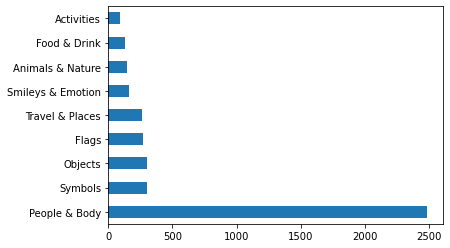

In [18]:
df2.emojigroup.value_counts().plot(kind='barh')

<AxesSubplot:ylabel='emojigroup'>

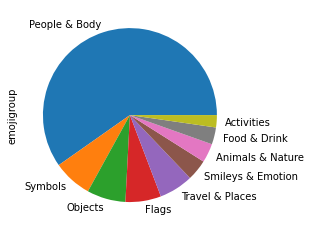

In [22]:
df2.emojigroup.value_counts().plot(kind='pie')

In [19]:
from matplotlib import pyplot as plt

In [20]:
#for using the same notebook
%matplotlib inline

In [1]:
# plt.xlabel('petal ')
# plt.ylabel('petal width')